# Computer Assignment 1 

This is an all-in-one report to 6123 IVP, where the explanations, discussions and codes are included.

All experiments are run in Python code.

Import the libs we need.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2

from matplotlib import rcParams
from matplotlib import rc
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.special import comb
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
pi = np.pi
%matplotlib inline

## 1. Color Conversion

Load `colors.jpg`. Note that openCV is defaulted to read image in BGR format. So if we want show image by matplotlib, we need adjust its channels.

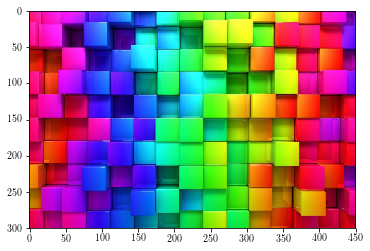

In [2]:
#load colorful image
#cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
#cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
#cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel
#simply pass integers 1, 0 or -1 respectively.
colors = cv2.imread('C:\\Users\\ZING\\Desktop\\6123\\CA\\Sol\\CA1\\colors.jpg',1)
#cv2.imshow doesn't give an inline picture
#BGR 2 RGB
BGR2RGB = [2,1,0]
plt.imshow(colors[:,:,BGR2RGB])

Show the shape of original image and its format

In [3]:
print(np.shape(colors))
print(type(colors[0,0,0]))

(300, 450, 3)
<class 'numpy.uint8'>


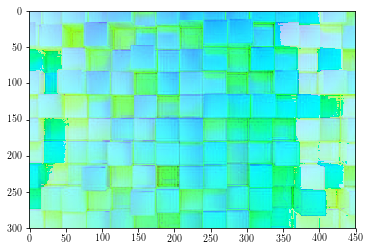

In [4]:
# BGR2HSV
colors_hsv = cv2.cvtColor(colors, cv2.COLOR_BGR2HSV)
plt.imshow(colors_hsv)

Show the shape of the mask.

In [5]:
# the range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
# find blue in HSV
mask = cv2.inRange(colors_hsv, lower_blue, upper_blue)
print(mask.shape)

(300, 450)


In [6]:
#create blue part
colors_blue = cv2.bitwise_and(colors,colors,mask=mask)

Text(0.5,1,'Blue Part')

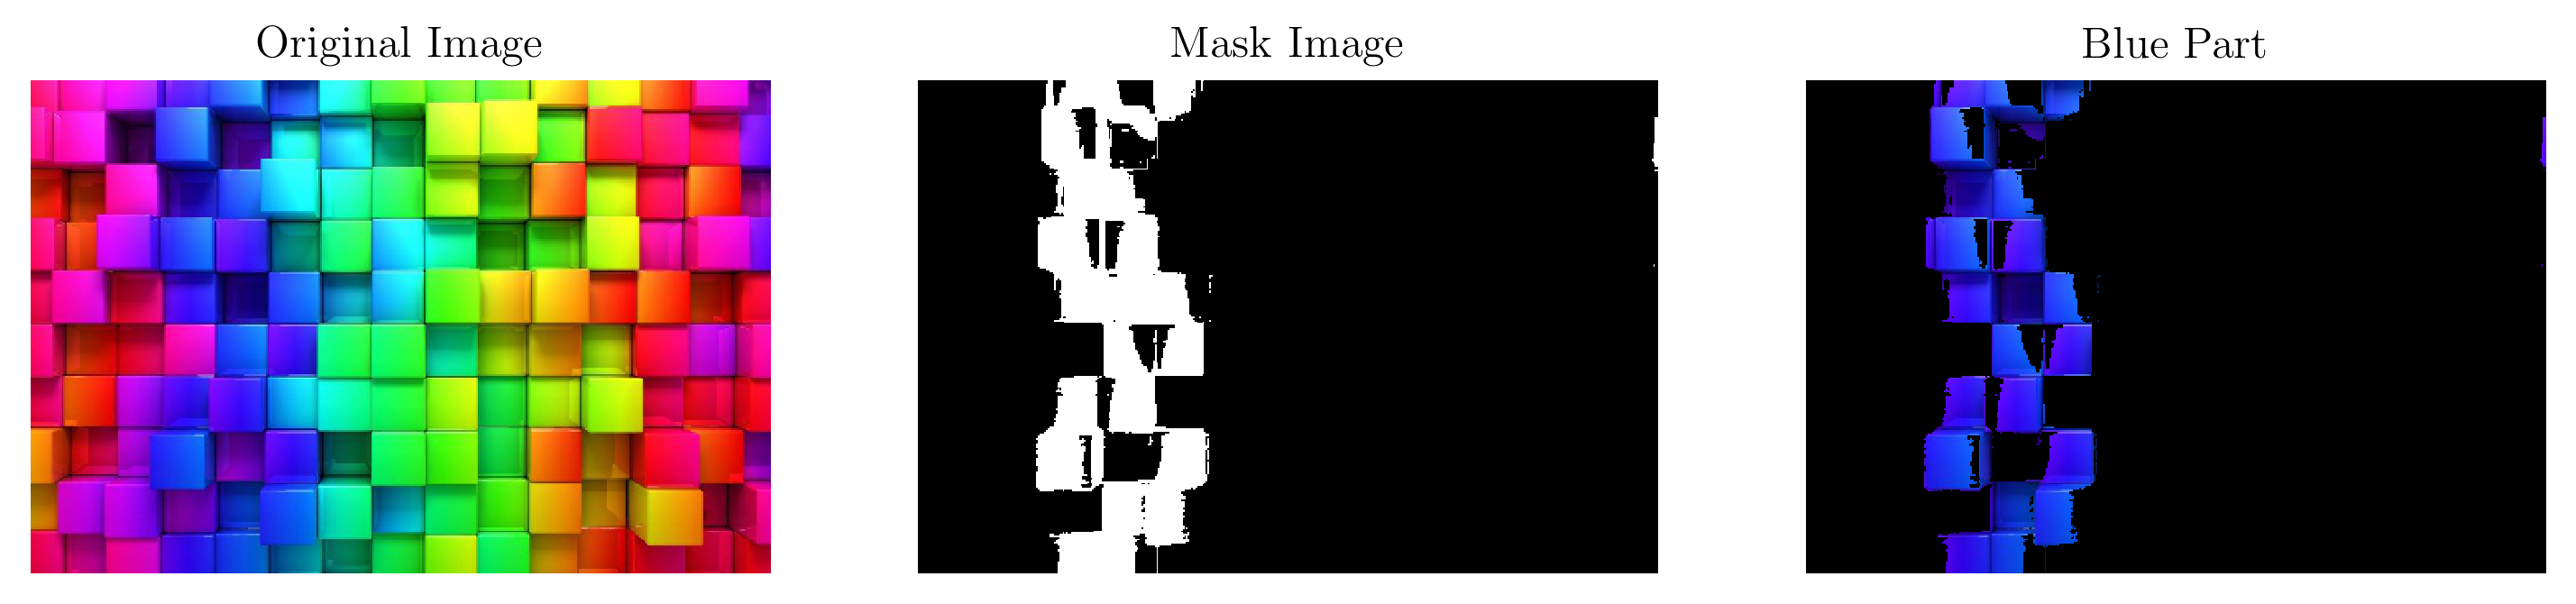

In [7]:
plt.figure(dpi=300,figsize = [12,6])

plt.subplot(131)
plt.imshow(colors[:,:,BGR2RGB])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(mask,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('Mask Image')

plt.subplot(133)
plt.imshow(colors_blue[:,:,BGR2RGB])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('Blue Part')

The threshold value for a certain color can be found as the following way:

S1. Pass a "pure" color in BGR, like red `[0,0,255]`, to cv2.cvtColor with parameter `cv2.COLOR_BGR2HSV` to get HSV values. In this case, red will return `[0,255,255]`

S2. Use +-10 as a threshold to range this color. In this case we could use `[170,255,255]` and `[10,255,255]`

S3. Properly adjust the last two channels to finally determine your range

In [8]:
print(cv2.cvtColor(np.array([[[0,0,255]]]).astype('uint8'),cv2.COLOR_BGR2HSV))

[[[  0 255 255]]]


## Histogram Operations

Load `wiki.jpg` in gray-scale

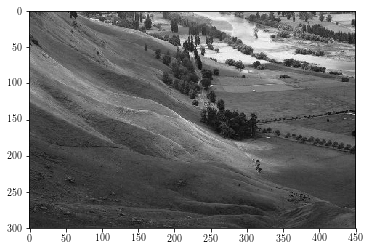

In [9]:
wiki = cv2.imread('C:/Users/ZING/Desktop/6123/CA/Sol/CA1/wiki.jpg',0)
plt.imshow(wiki,cmap='gray')

In [10]:
print(np.shape(wiki))

(300, 450)


Text(0.5,1,'Histogram of wiki.jpg')

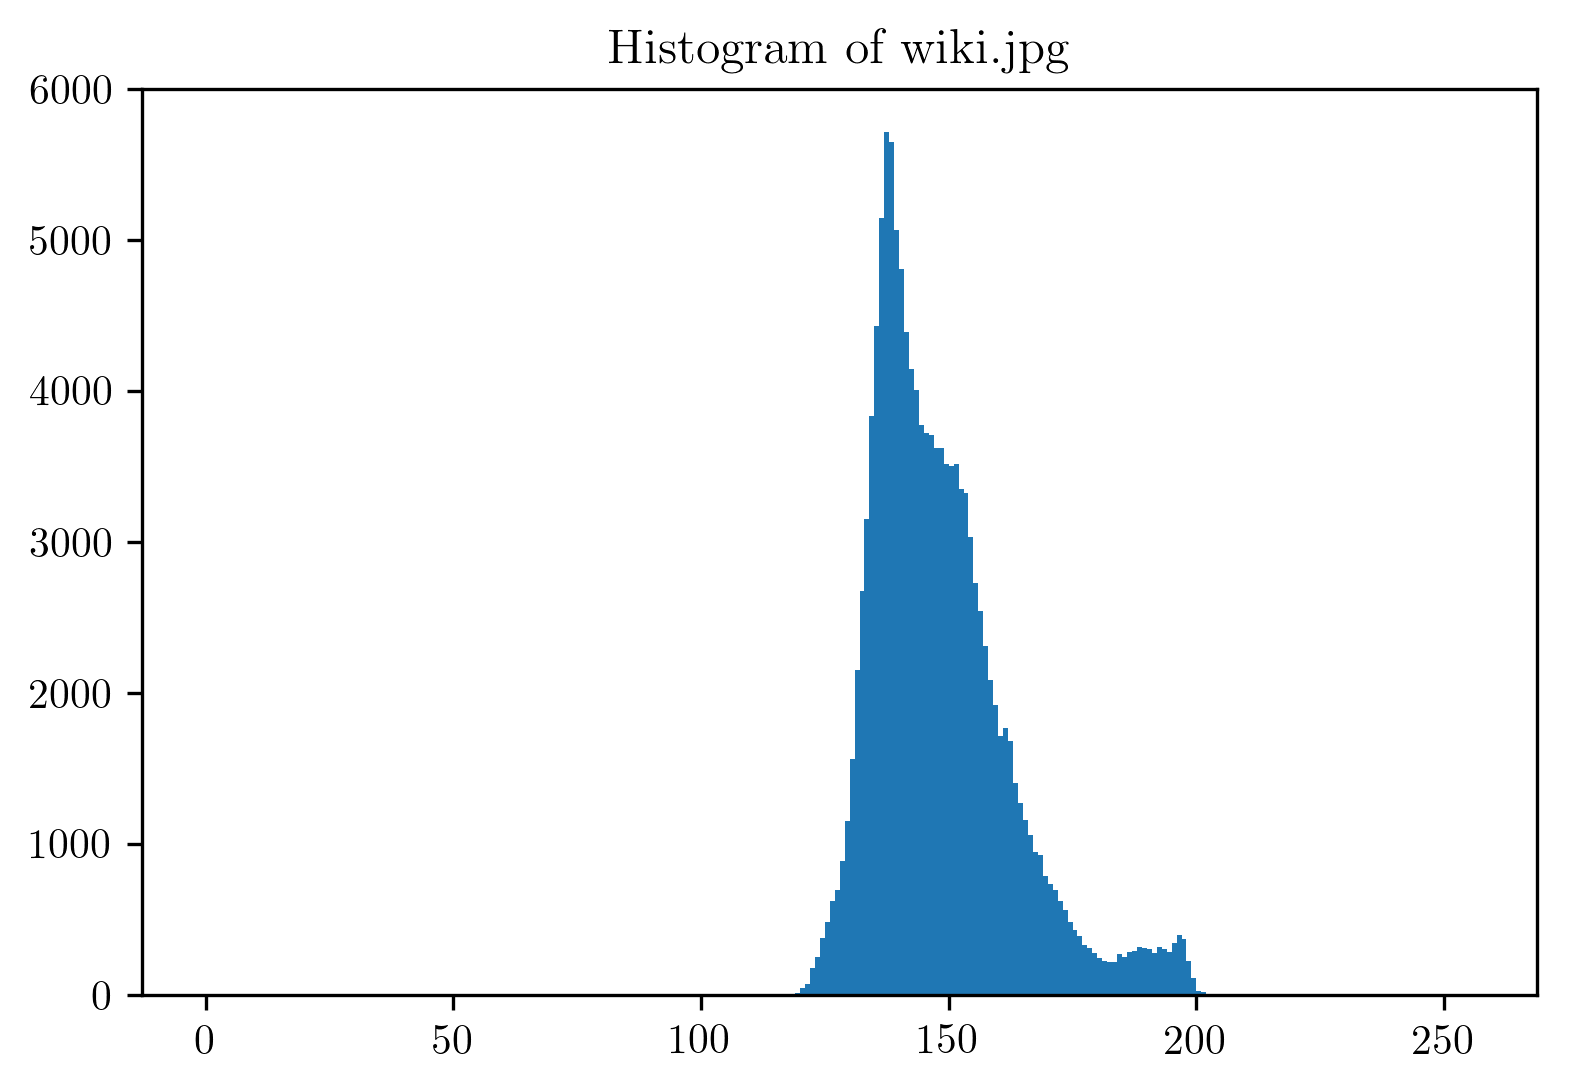

In [11]:
plt.figure(dpi=300)
wiki_hist,bins,_ = plt.hist(wiki.ravel(),bins=range(257))
plt.title('Histogram of wiki.jpg')

Text(0.5,1,'wiki Cumsum')

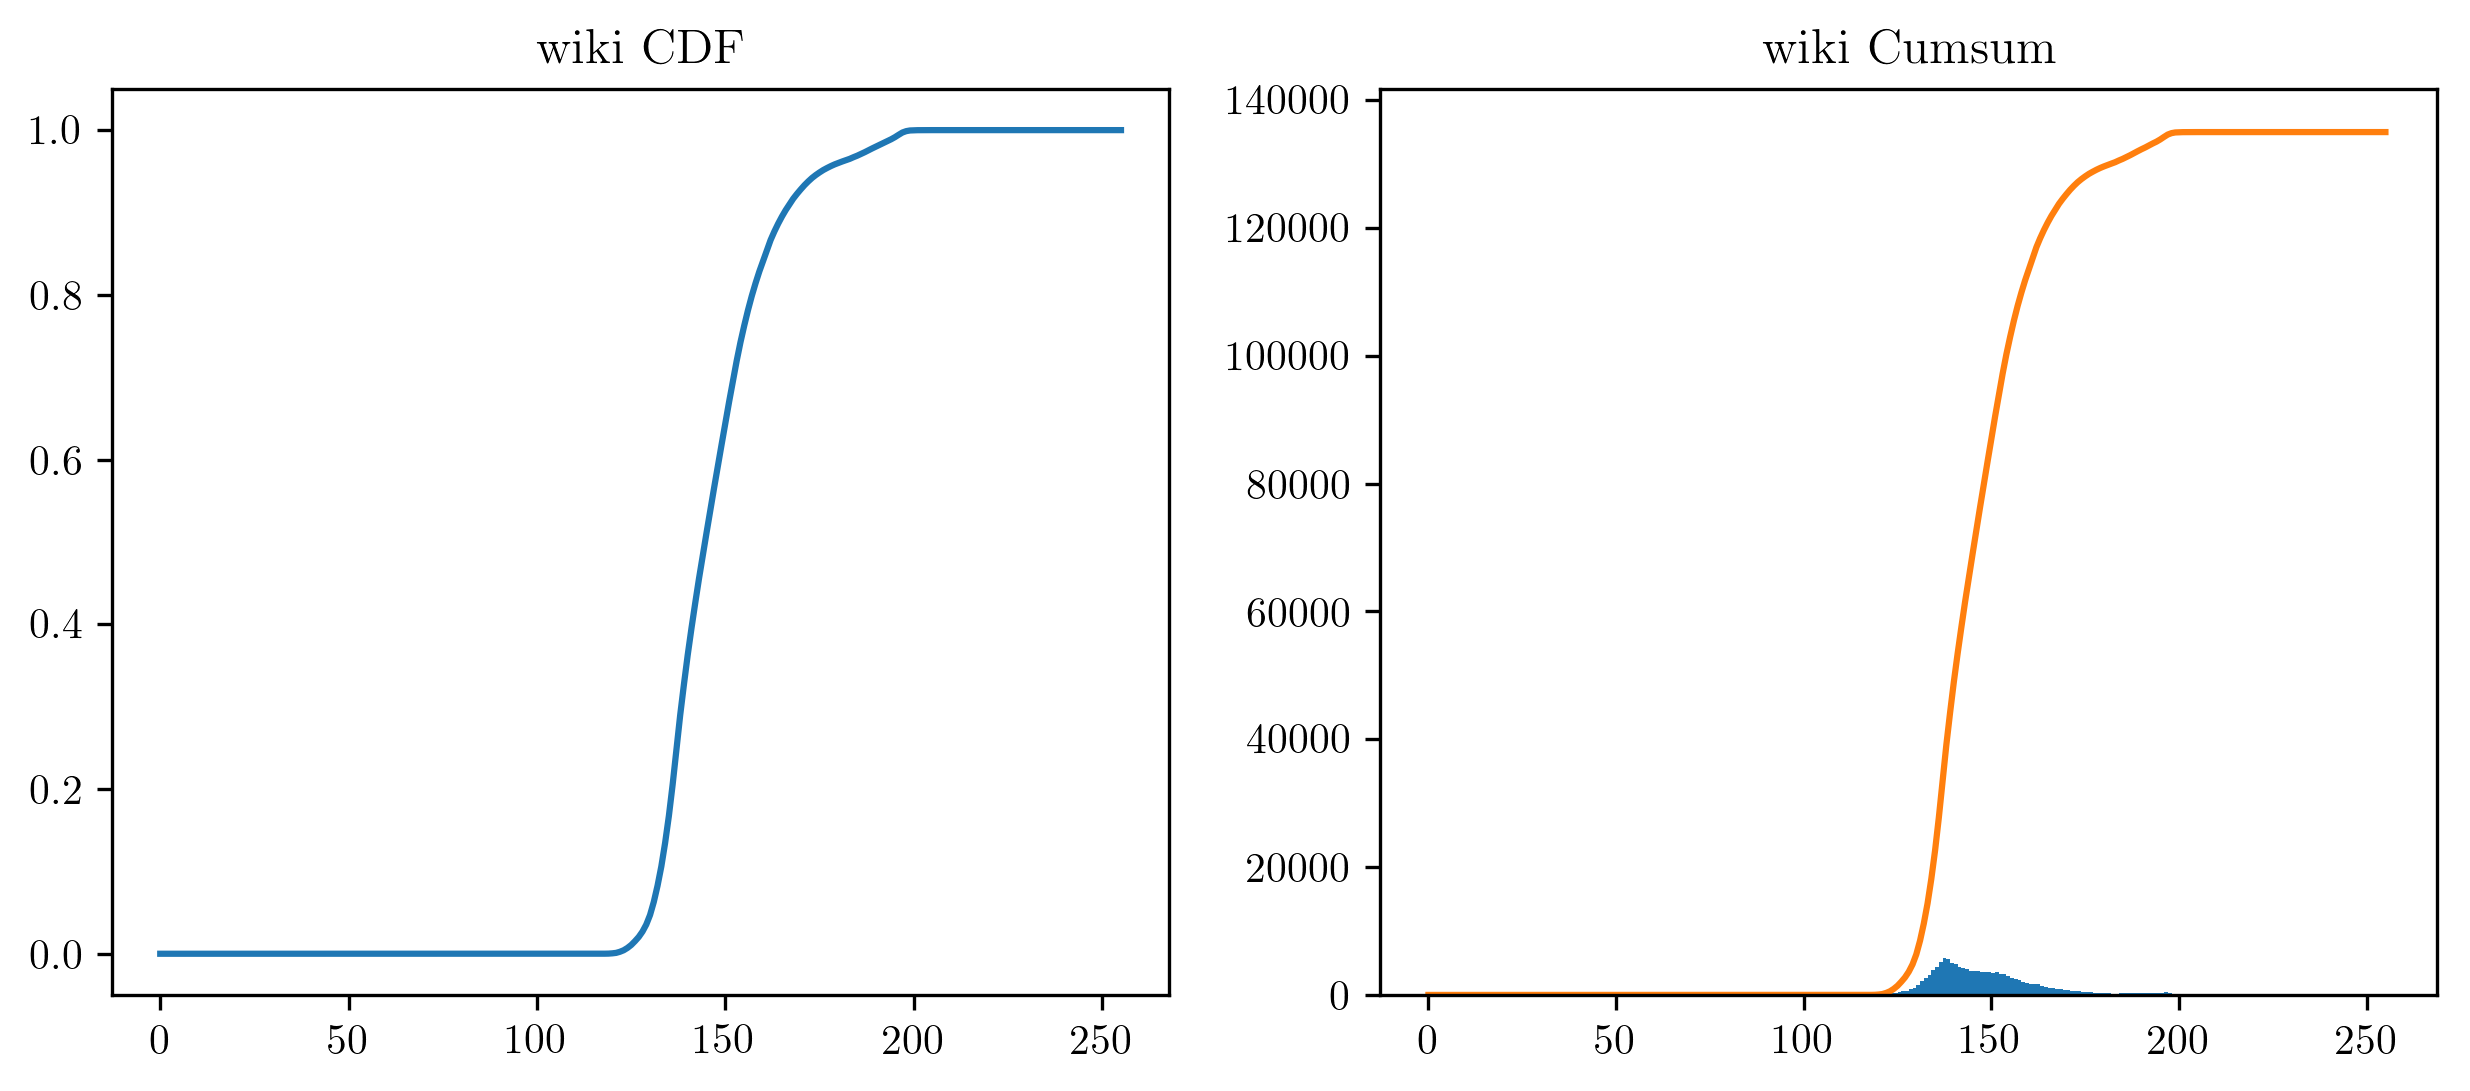

In [12]:
wiki_cdf = np.cumsum(wiki_hist)
wiki_cdf = wiki_cdf / np.max(wiki_cdf)
plt.figure(dpi=300,figsize=[10,4])
plt.subplot(121)
plt.plot(range(256),wiki_cdf)
plt.title('wiki CDF')
plt.subplot(122)
plt.hist(wiki.ravel(),bins=range(257))
plt.plot(range(256),np.cumsum(wiki_hist))
plt.title('wiki Cumsum')

In [13]:
def histogram_equalization_uint8(img):
    img_hist,_ = np.histogram(img,range(257))
    img_cdf = np.cumsum(img_hist)
    img_cdf = img_cdf / np.max(img_cdf)
    img_eq = np.round(img_cdf[img]*255).astype('uint8')
    return img_eq

In [14]:
wiki_eq = histogram_equalization_uint8(wiki)

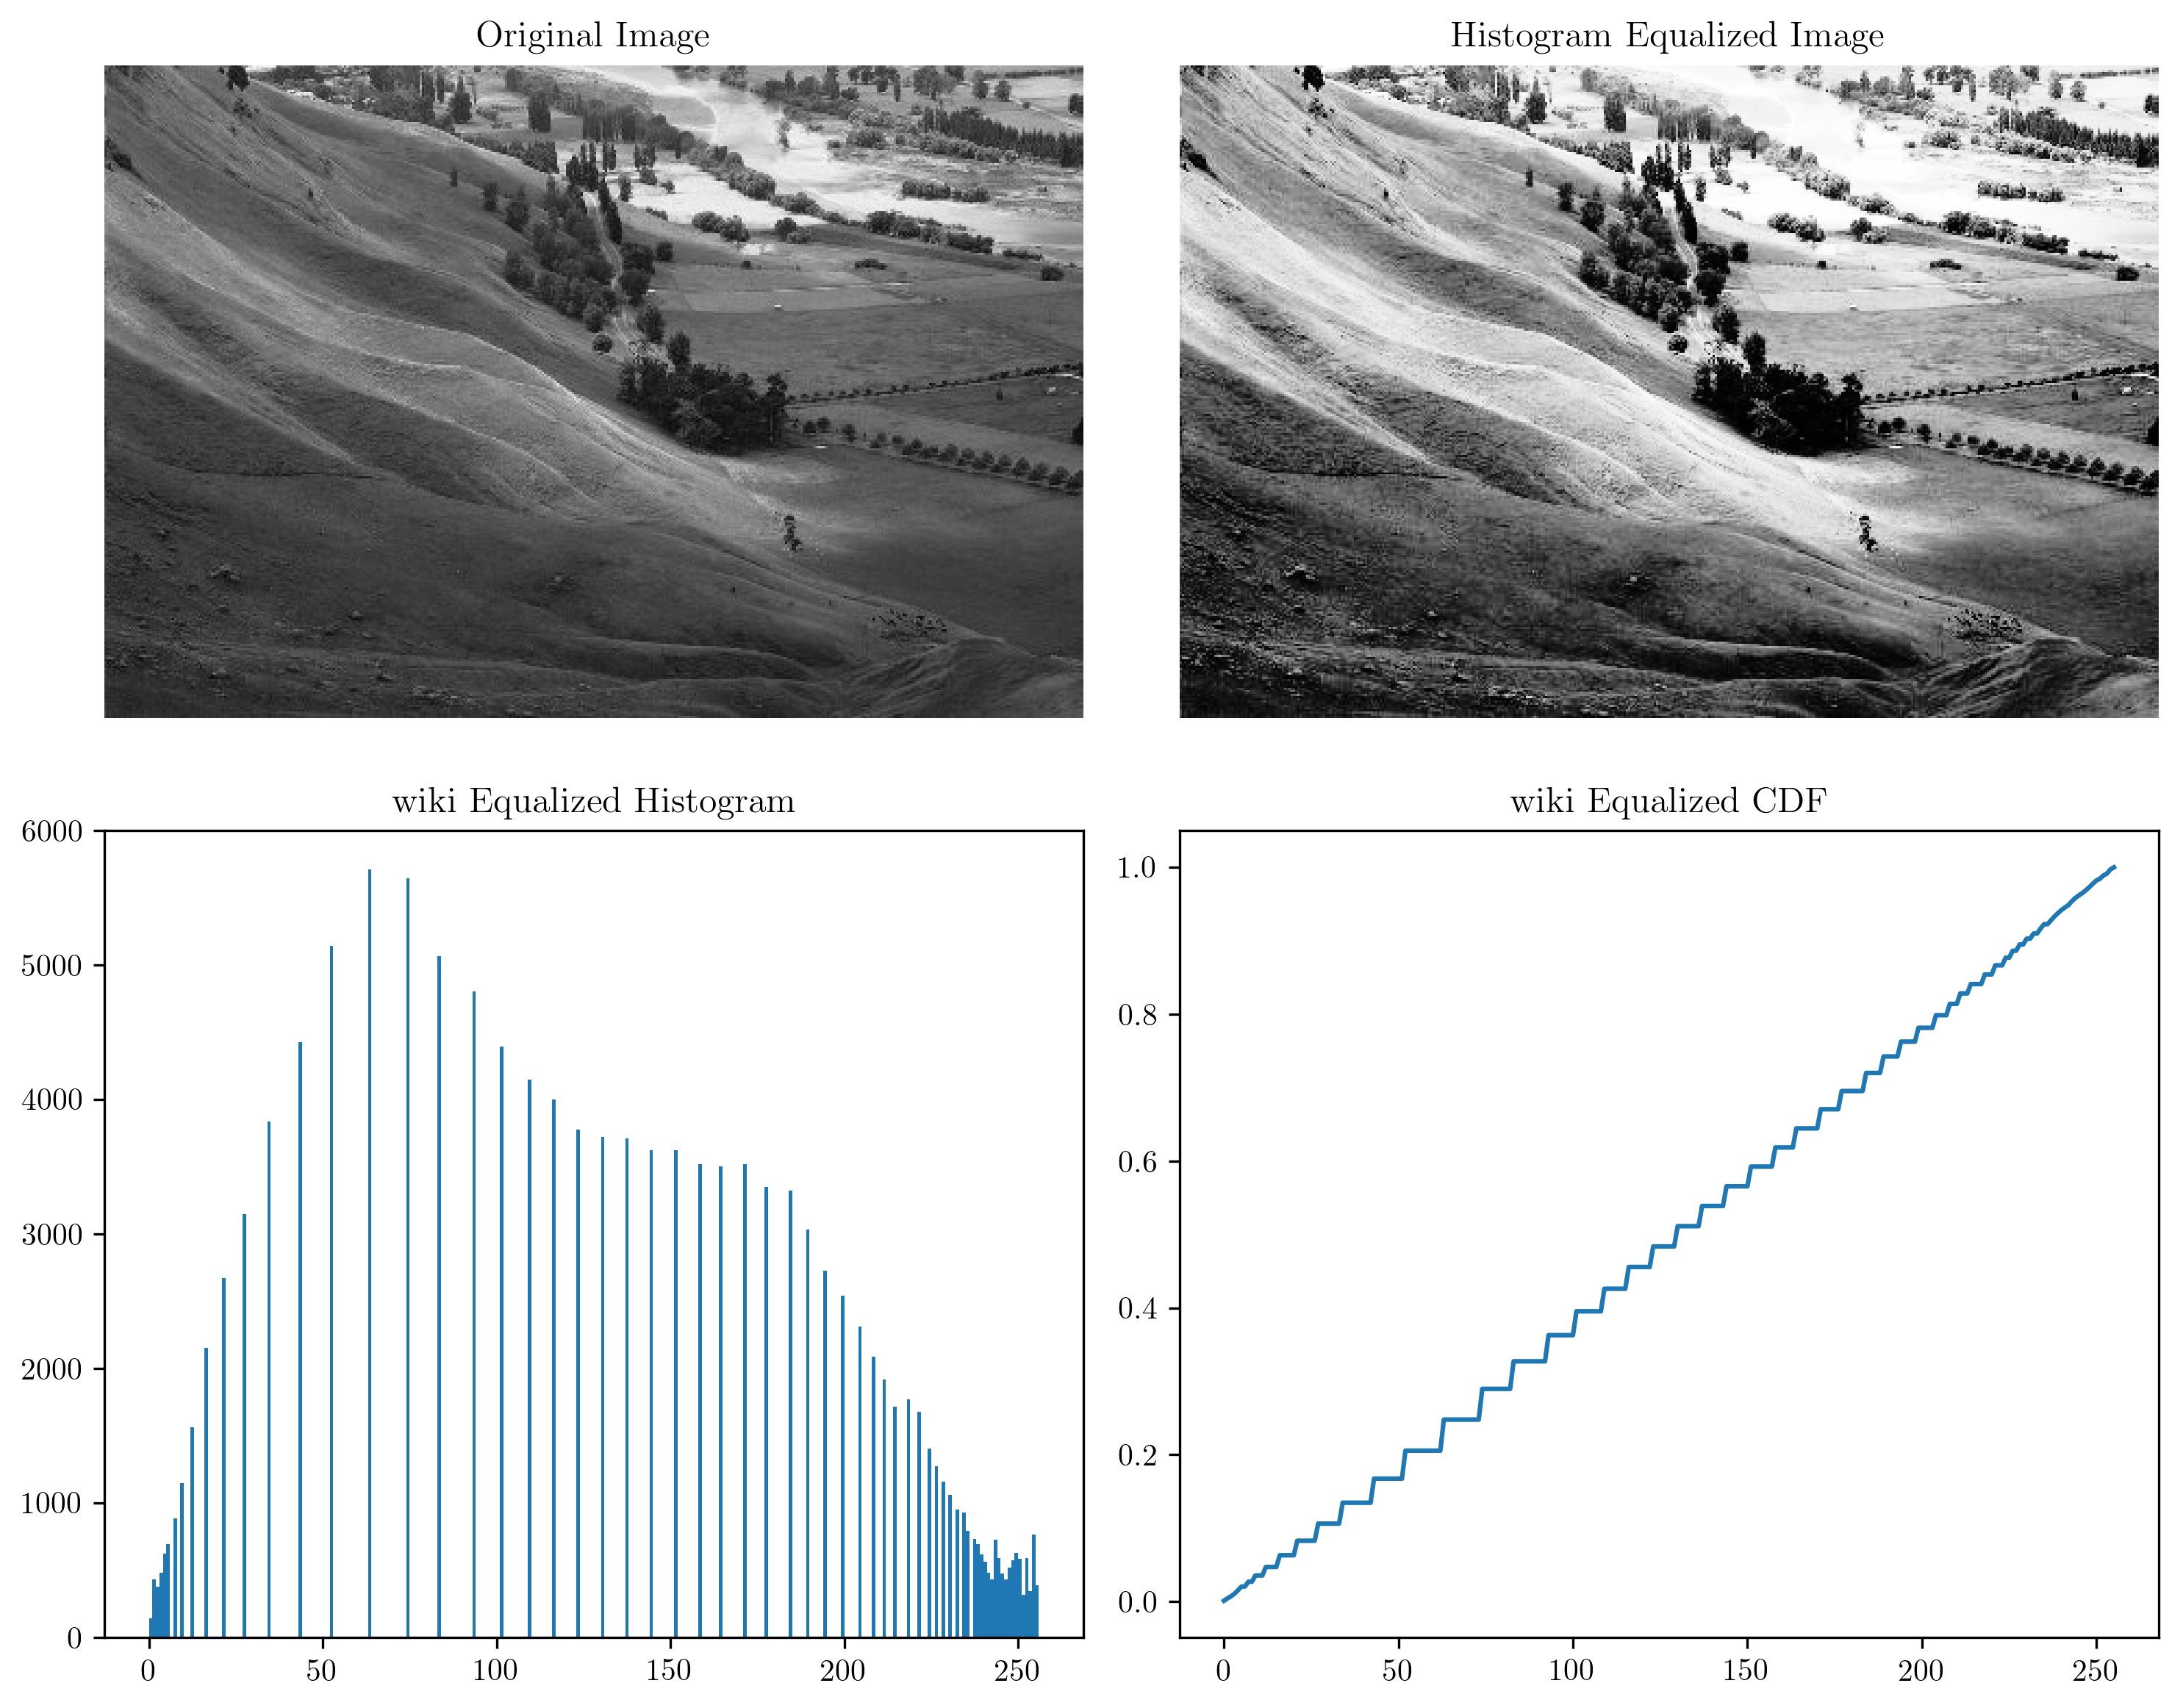

In [15]:
plt.figure(dpi=300,figsize=[10,8])
plt.subplot(221)
plt.imshow(wiki,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('Original Image')
plt.subplot(222)
plt.imshow(wiki_eq,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('Histogram Equalized Image')
plt.subplot(223)
wiki_eq_hist,_=np.histogram(wiki_eq,range(257))
wiki_eq_cs = np.cumsum(wiki_eq_hist)
plt.hist(wiki_eq.ravel(),bins=range(257))
plt.title('wiki Equalized Histogram')
plt.subplot(224)
plt.plot(range(256),wiki_eq_cs/np.max(wiki_eq_cs))
plt.title('wiki Equalized CDF')
plt.tight_layout()